In [1]:
%pwd

'C:\\Users\\thanu\\Downloads\\HR promotion data'

In [2]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 2AF4-788F

 Directory of C:\Users\thanu\Downloads\HR promotion data

03/15/2022  05:15 PM    <DIR>          .
04/06/2022  09:52 AM    <DIR>          ..
03/12/2022  05:29 PM    <DIR>          .ipynb_checkpoints
03/15/2022  12:16 AM         1,004,102 HR Anaytics Final 2.ipynb
02/16/2022  07:15 PM         1,538,018 test.csv
02/19/2022  12:15 PM         3,650,017 train.csv
               3 File(s)      6,192,137 bytes
               3 Dir(s)  292,653,932,544 bytes free


In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
train = pd.read_csv("train.csv", header = 0)
test = pd.read_csv("test.csv", header = 0)

In [134]:
train.shape

(54808, 13)

In [135]:
test.shape

(23490, 12)

In [136]:
train.head().T

,0,1,2,3,4
employee_id,65438,65141,7513,2542,48945
department,Sales & Marketing,Operations,Sales & Marketing,Sales & Marketing,Technology
region,region_7,region_22,region_19,region_23,region_26
education,Master's & above,Bachelor's,Bachelor's,Bachelor's,Bachelor's
gender,f,m,m,m,m
recruitment_channel,sourcing,other,sourcing,other,other
no_of_trainings,1,1,1,2,1
age,35,30,34,39,45
previous_year_rating,5.0,5.0,3.0,1.0,3.0
length_of_service,8,4,7,10,2


In [137]:
test.head().T

,0,1,2,3,4
employee_id,8724,74430,72255,38562,64486
department,Technology,HR,Sales & Marketing,Procurement,Finance
region,region_26,region_4,region_13,region_2,region_29
education,Bachelor's,Bachelor's,Bachelor's,Bachelor's,Bachelor's
gender,m,f,m,f,m
recruitment_channel,sourcing,other,other,other,sourcing
no_of_trainings,1,1,1,3,1
age,24,31,31,31,30
previous_year_rating,NaN,3.0,1.0,2.0,4.0
length_of_service,1,5,4,9,7


In [138]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [139]:
train.dtypes.value_counts()

int64      7
object     5
float64    1
dtype: int64

In [140]:
#Descriptive Statistics
#Descriptive Statistics is one of the most Important Step to Understand the Data and take out Insights
#for Numerical Columns we check for stats such as Max, Min, Mean, count, standard deviation, 25 percentile, 
#50 percentile, and 75 percentile.

In [141]:
train.describe().style.background_gradient(cmap = 'copper')

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [142]:
# quite clear that we are not having Outliers in our Dataset, 
# the average training score for most of the Employee lie between 40 to 100, which is a very good distribution 
# Also, the Length of service, is not having very disruptive values, so we can keep them for model training.

In [143]:
#Descriptive statistics for categorical columns
train.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


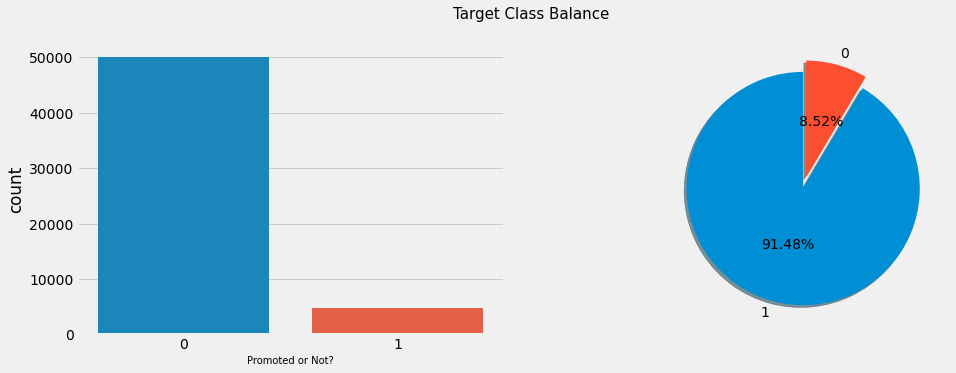

In [144]:
# lets check the Target Class Balance

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(train['is_promoted'],)

plt.xlabel('Promoted or Not?', fontsize = 10)

plt.subplot(1, 2, 2)
train['is_promoted'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['1','0'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Target Class Balance', fontsize = 15)
plt.show()

In [145]:
#Target Class is Highly Imbalanced, and we must balance these classes of Target Class. 
# Most of the Times, when we use Machine Learning Models with Imbalanced Classes,
#we have very poor Results which are completely biased towards the class having Higher Distribution.

In [146]:
#computing Missing Values

In [147]:
train_total = train.isnull().sum()

# lets calculate the percentage of missing values in the dataset
train_percent = ((train.isnull().sum()/train.shape[0])*100).round(2)

# lets calculate the total missing values in the dataset
test_total = test.isnull().sum()

# lets calculate the percentage of missing values in the dataset
test_percent = ((test.isnull().sum()/test.shape[0])*100).round(2)

# lets make a dataset consisting of total no. of missing values and percentage of missing values in the dataset
train_missing_data = pd.concat([train_total, train_percent, test_total, test_percent],
                                axis=1, 
                                keys=['Train_Total', 'Train_Percent %','Test_Total', 'Test_Percent %'],
                                sort = True)
train_missing_data


,Train_Total,Train_Percent %,Test_Total,Test_Percent %
age,0,0.00,0.0,0.00
avg_training_score,0,0.00,0.0,0.00
awards_won?,0,0.00,0.0,0.00
department,0,0.00,0.0,0.00
education,2409,4.40,1034.0,4.40
employee_id,0,0.00,0.0,0.00
gender,0,0.00,0.0,0.00
is_promoted,0,0.00,NaN,NaN
length_of_service,0,0.00,0.0,0.00
no_of_trainings,0,0.00,0.0,0.00


In [148]:
#only two columns have missing values in Train and Test Dataset both.
#Also, the Percentage of Missing values is around 4% and 7% in education, and previous_year_rating respectively. 
#So, do not have delete any missing values, we can simply impute the values using Mean, Median, and Mode Values.

# Imputing the missing values in the Training Data
# we are replacing the missing values with the mode of that column

train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Training Data :", train.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


In [149]:
test['education'] = test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Test Data :", test.isnull().sum().sum())

Number of Missing Values Left in the Test Data : 0


In [150]:
#Detection of outliers
# Lets first analyze the Numerical Columns
train.select_dtypes('number').head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,0,49,0
1,65141,1,30,5.0,4,0,60,0
2,7513,1,34,3.0,7,0,50,0
3,2542,2,39,1.0,10,0,50,0
4,48945,1,45,3.0,2,0,73,0


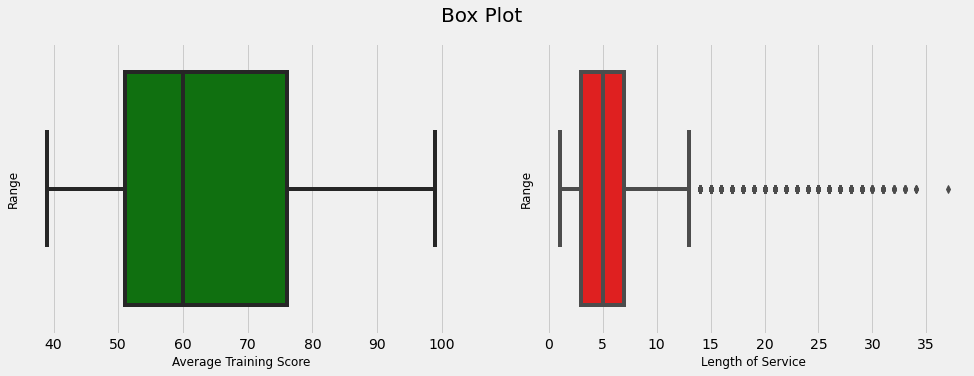

In [151]:
# lets check the boxplots for the columns where we suspect for outliers
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Box plot for average training score
plt.subplot(1, 2, 1)
sns.boxplot(train['avg_training_score'], color = 'green')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for length of service
plt.subplot(1, 2, 2)
sns.boxplot(train['length_of_service'], color = 'red')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

<AxesSubplot:>

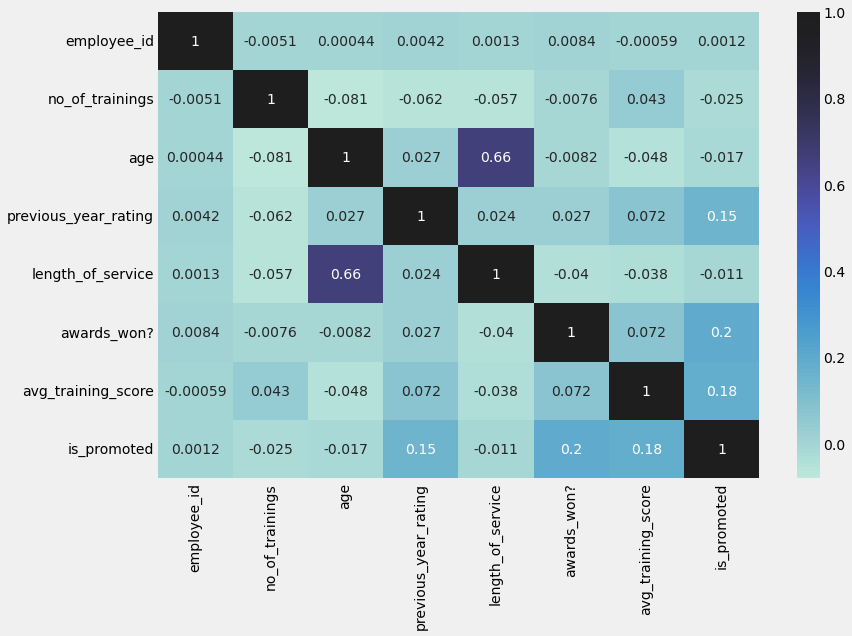

In [152]:
# lets check the Heat Map for the Data with respect to correlation.

plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(train, columns=train.columns).corr(), annot=True, center=True)

In [153]:
#Here, we can see some obvious results, that is Length of Service, and Age are Highly Correlated
# and Previous year rating,is_promoted and avg training score and is_promoted are correlated to some extent,
# hinting that there is some relation.

<AxesSubplot:title={'center':'Percentage share of employees coming from \ndifferent levels of educations, by department\n'}, xlabel='education', ylabel='department'>

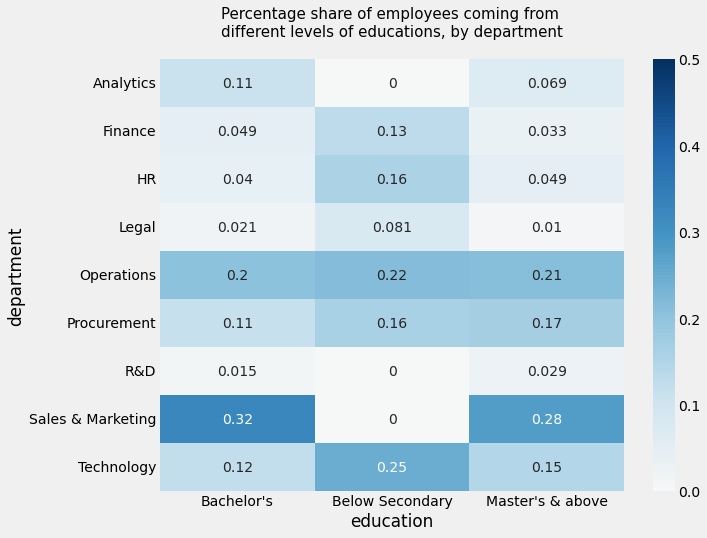

In [154]:
fig = plt.figure(figsize=(25,20))
fig.subplots_adjust(top=0.85, wspace=0.7,hspace = 0.6)

ax1 = fig.add_subplot(2,2,1)
ax1.set_title("Percentage share of employees coming from \ndifferent levels of educations, by department\n",size=15)
sns.heatmap(pd.crosstab(train.department, train.education, normalize = 'columns'),cmap="RdBu",vmax=0.5, annot=True, cbar=True, center=0,cbar_kws={"shrink":1})

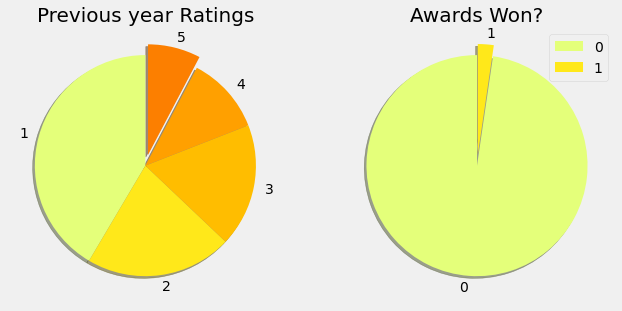

In [155]:
#plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
labels = ['1', '2', '3', '4', '5']
sizes = train['previous_year_rating'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Previous year Ratings', fontsize = 20)

# plotting a pie chart to represent share of awards won of the Employees
plt.subplot(1, 3, 3)
labels = ['0', '1']
sizes = train['awards_won?'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Awards Won?', fontsize = 20)


plt.legend()
plt.show()

In [156]:
#We, can see that there are some pie charts for Previous year Ratings, and Awards Won? 
#Also,Most of the Employees have a very low rating for the previous year, and very few employees, 
#probably 2% of them could get awards for their work, which is normal.

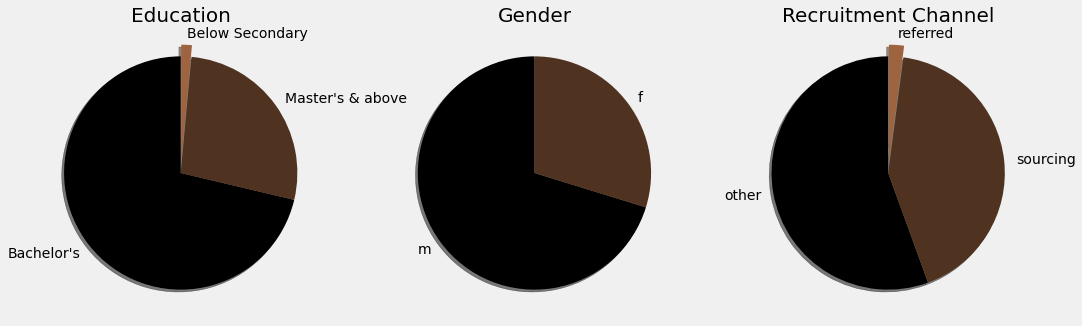

In [157]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)

# plotting a pie chart to represent share of education of the Employees
plt.subplot(1, 3, 1)
labels = train['education'].value_counts().index
sizes = train['education'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Education', fontsize = 20)

# plotting a pie chart to represent share of gender of the Employees
plt.subplot(1, 3, 2)
labels = train['gender'].value_counts().index
sizes = train['gender'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Gender', fontsize = 20)

# plotting a pie chart to represent share of recruitment channel of the Employees
plt.subplot(1, 3, 3)
labels = train['recruitment_channel'].value_counts().index
sizes = train['recruitment_channel'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0,0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode=explode,shadow = True, startangle = 90)
plt.title('Recruitment Channel', fontsize = 20)

plt.show()

In [158]:
#lets infer the Main Highlights 
#Large percentage of employees completed their bachelors
#Females are Minority as compared to their Male Counterparts
#most of the employees are recruited either by sourcing, or some other recruitment agencies, sources etc.

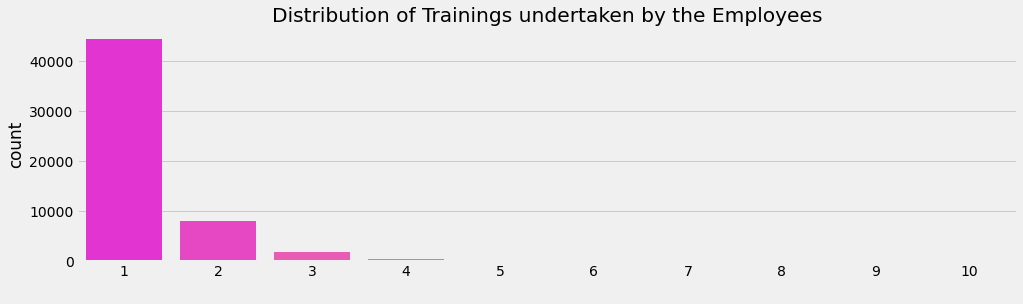

In [159]:
# lets check the distribution of trainings undertaken by the employees

plt.rcParams['figure.figsize'] = (15, 4)
sns.countplot(train['no_of_trainings'], palette = 'spring')
plt.xlabel(' ', fontsize = 14)
plt.title('Distribution of Trainings undertaken by the Employees')
plt.show()

In [160]:
#The above Countplot checks the distribution of trainings undertaken by the Employee, 
#It is clearly visible that 80 % of the employees have taken the training only once, 
#and there are negligible no. of employees, who took trainings more than thrice.

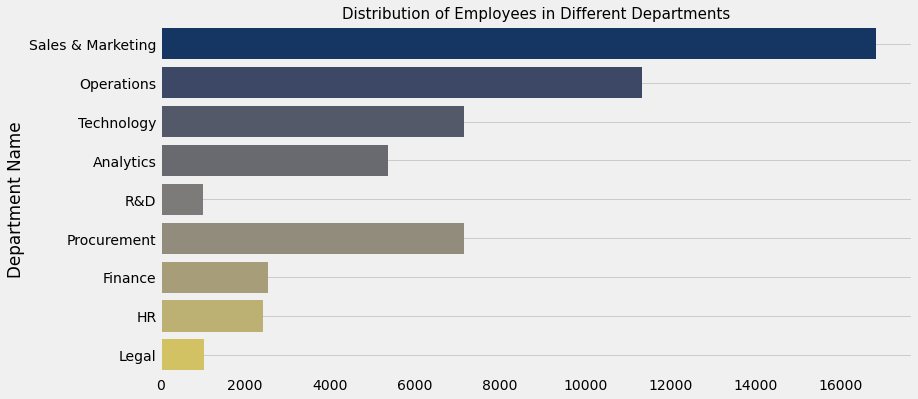

In [161]:
# lets check different Departments

plt.rcParams['figure.figsize'] = (12, 6)
sns.countplot(y = train['department'], palette = 'cividis', orient = 'v')
plt.xlabel('')
plt.ylabel('Department Name')
plt.title('Distribution of Employees in Different Departments', fontsize = 15)
plt.grid()

plt.show()

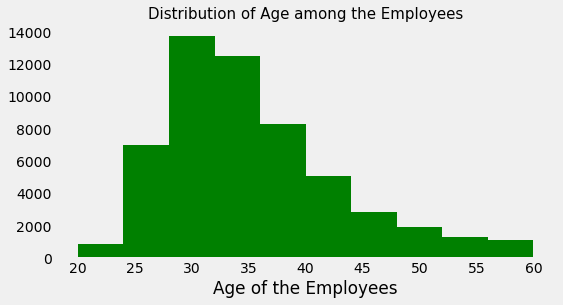

In [162]:
# lets check the Age of the Employees

plt.rcParams['figure.figsize'] = (8, 4)
plt.hist(train['age'], color = 'green')
plt.title('Distribution of Age among the Employees', fontsize = 15)
plt.xlabel('Age of the Employees')
plt.grid()
plt.show()

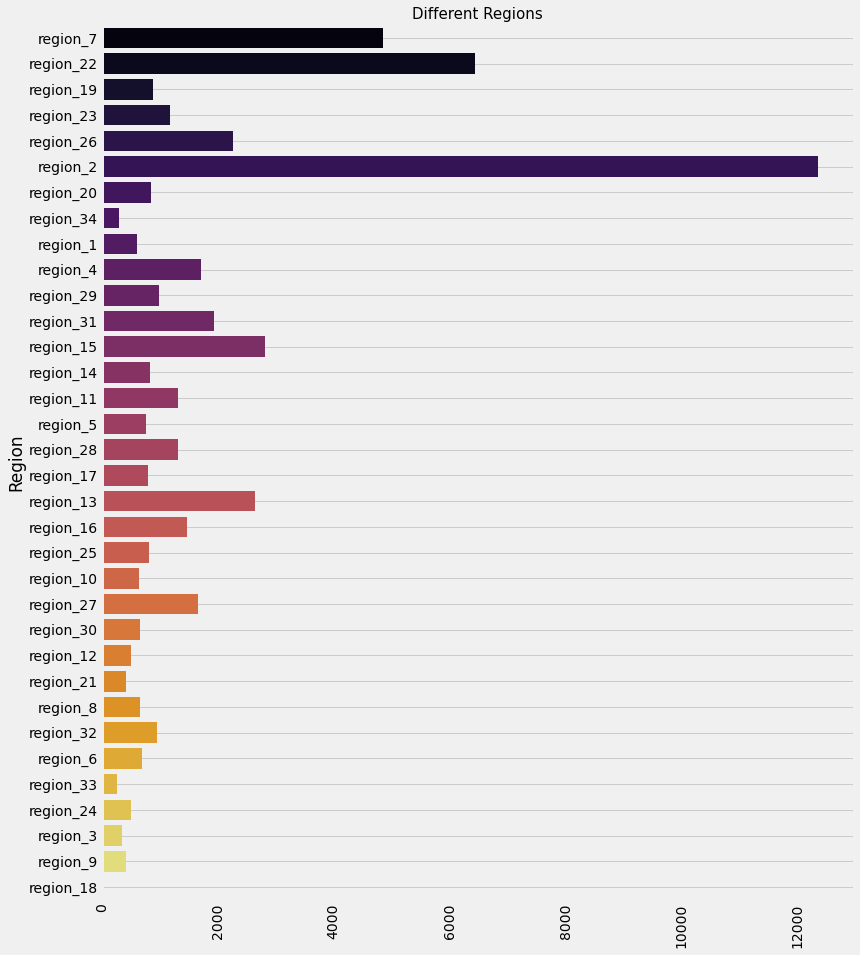

In [163]:
# lets check distribution of different Regions

plt.rcParams['figure.figsize'] = (12,15)
plt.style.use('fivethirtyeight')
sns.countplot(y = train['region'], palette = 'inferno', orient = 'v')
plt.xlabel('')
plt.ylabel('Region')
plt.title('Different Regions', fontsize = 15)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

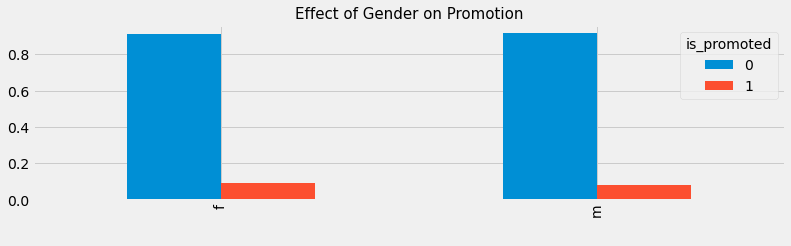

In [164]:
# Lets compare the Gender Gap in the promotion

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 3)
x = pd.crosstab(train['gender'], train['is_promoted'])
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Effect of Gender on Promotion', fontsize = 15)
plt.xlabel(' ')
plt.show()

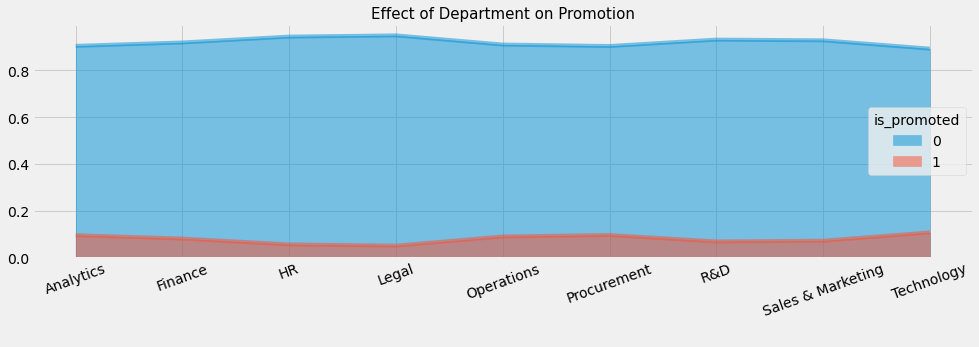

In [165]:
# lets compare the effect of different Departments and Promotion

plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(train['department'], train['is_promoted'])
colors = plt.cm.copper(np.linspace(0, 1, 3))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'area', stacked = False)
plt.title('Effect of Department on Promotion', fontsize = 15)
plt.xticks(rotation = 20)
plt.xlabel(' ')
plt.show()

In [166]:
#From the above chart we can see that almost all the Departments have a very similar effect on Promotion. 
#So, we can consider that all the Departments have a similar effect on the promotion. 

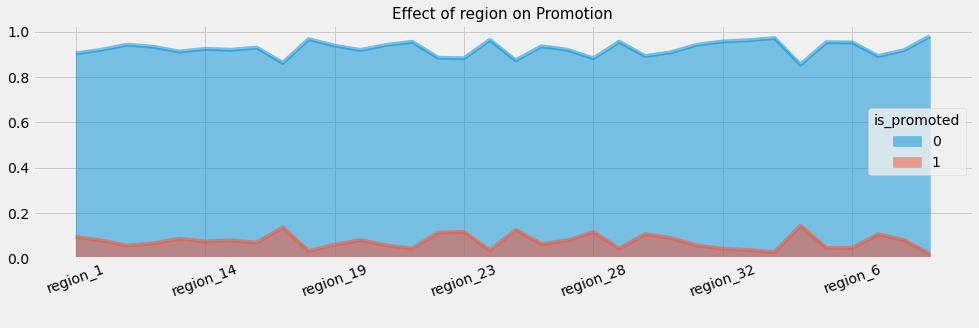

In [167]:
# lets compare the effect of region and Promotion

plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(train['region'], train['is_promoted'])
colors = plt.cm.copper(np.linspace(0, 1, 3))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'area', stacked = False)
plt.title('Effect of region on Promotion', fontsize = 15)
plt.xticks(rotation = 20)
plt.xlabel(' ')
plt.show()

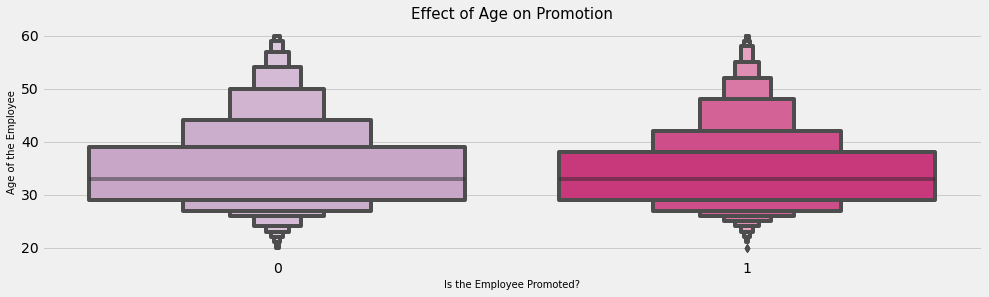

In [168]:
# Effect of Age on the Promotion

plt.rcParams['figure.figsize'] = (15,4)
sns.boxenplot(train['is_promoted'], train['age'], palette = 'PuRd')
plt.title('Effect of Age on Promotion', fontsize = 15)
plt.xlabel('Is the Employee Promoted?', fontsize = 10)
plt.ylabel('Age of the Employee', fontsize = 10)
plt.show()

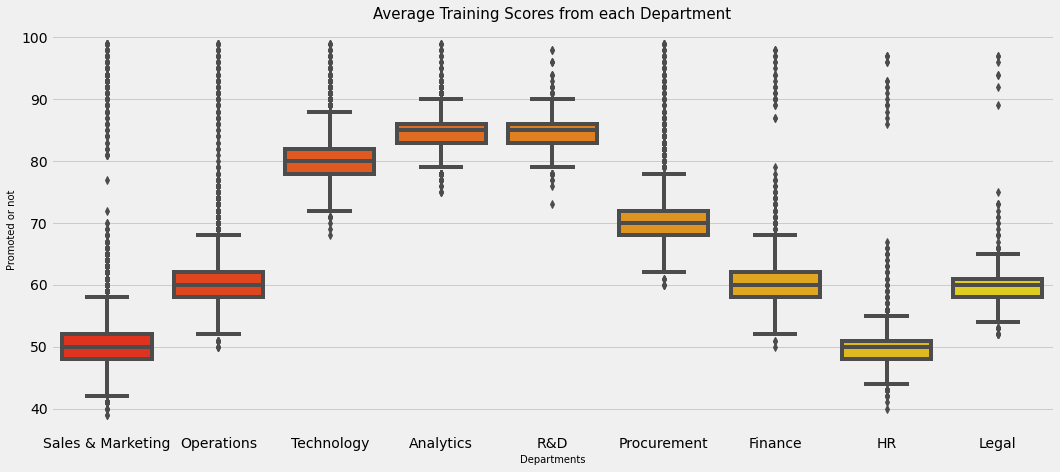

In [169]:
# Department Vs Average Training Score

plt.rcParams['figure.figsize'] = (16, 7)
sns.boxplot(train['department'], train['avg_training_score'], palette = 'autumn')
plt.title('Average Training Scores from each Department', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

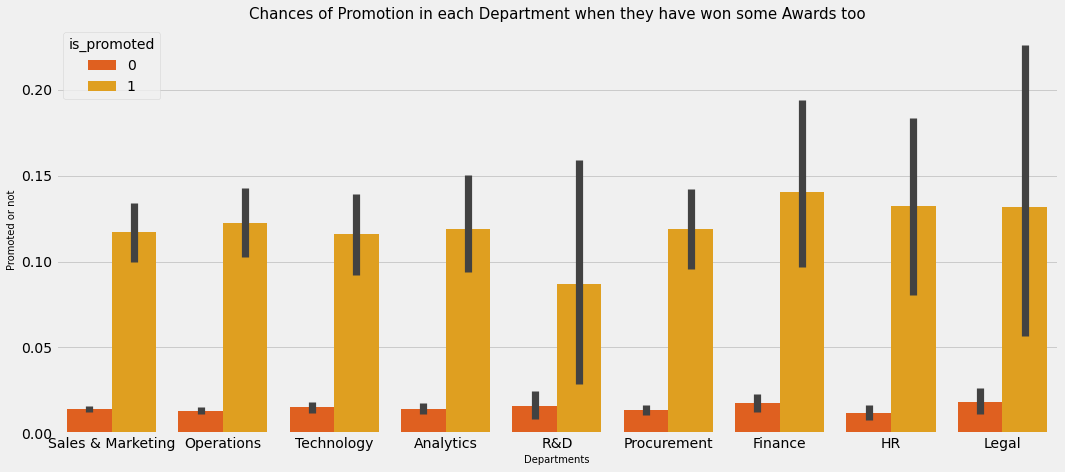

In [170]:
# lets check the relation of Departments and Promotions when they won awards ?

plt.rcParams['figure.figsize'] = (16, 7)
sns.barplot(train['department'], train['awards_won?'], hue = train['is_promoted'], palette = 'autumn')
plt.title('Chances of Promotion in each Department when they have won some Awards too', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

In [171]:
#merge train and test for preprocessing
df = train
df = df.append(test)
df.shape

(78298, 13)

In [172]:
#onehotencoder for categorical features to numerical variables
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto')
ohe_arr = ohe.fit_transform(df[['department','region','education','gender','recruitment_channel']]).toarray()
ohe_labels = ohe.get_feature_names(['department','region','education','gender','recruitment_channel'])
ohe_df = pd.DataFrame(ohe_arr, columns= ohe_labels)
ohe_df.head()

,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [173]:
#drop columns and concat both dataframes
df.drop(columns= ['department','region','education','gender','recruitment_channel'], inplace=True)

In [174]:
df.reset_index(inplace=True)
df = pd.concat([df,ohe_df],axis=1,join='inner')
df.shape

(78298, 60)

In [175]:
df.drop(columns= ['index'], inplace=True)
df.shape

(78298, 59)

In [176]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['no_of_trainings','age','previous_year_rating','length_of_service','awards_won?','avg_training_score']] = scaler.fit_transform(df[['no_of_trainings','age','previous_year_rating','length_of_service','awards_won?','avg_training_score']])
df.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0.000000,0.375,1.0,0.194444,0.0,0.166667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,65141,0.000000,0.250,1.0,0.083333,0.0,0.350000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,7513,0.000000,0.350,0.5,0.166667,0.0,0.183333,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2542,0.111111,0.475,0.0,0.250000,0.0,0.183333,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,48945,0.000000,0.625,0.5,0.027778,0.0,0.566667,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [181]:
#Validation Data
#separate train and test datasets
train, test = df[~df['is_promoted'].isnull()], df[df['is_promoted'].isnull()]
print("Shape of Train Dataset: ",train.shape)
print("Shape of Test Dataset: ",test.shape)

Shape of Train Dataset:  (54808, 59)
Shape of Test Dataset:  (23490, 59)


In [182]:
train.drop(columns=['employee_id'],inplace=True)
print("Shape of Train Dataset: ",train.shape)


Shape of Train Dataset:  (54808, 58)


In [184]:
test.shape
test.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
54808,8724,0.000000,0.100,0.50,0.000000,0.0,0.633333,NaN,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
54809,74430,0.000000,0.275,0.50,0.111111,0.0,0.200000,NaN,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
54810,72255,0.000000,0.275,0.00,0.083333,0.0,0.133333,NaN,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
54811,38562,0.222222,0.275,0.25,0.222222,0.0,0.433333,NaN,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
54812,64486,0.000000,0.250,0.75,0.166667,0.0,0.366667,NaN,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [185]:
# train valid split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train.drop(columns=['is_promoted']),train['is_promoted'], test_size=0.3)
print("Shape of X Train Dataset: ",X_train.shape)
print("Shape of Y Train Dataset: ", y_train.shape)
print("Shape of X Valid Dataset: ",X_valid.shape)
print("Shape of Y Valid Dataset: ",y_valid.shape)

Shape of X Train Dataset:  (38365, 57)
Shape of Y Train Dataset:  (38365,)
Shape of X Valid Dataset:  (16443, 57)
Shape of Y Valid Dataset:  (16443,)


In [ ]:
#Synthetic Minority Oversampling Technique, or SMOTE for short.
#SMOTE works by utilizing a k-nearest neighbour algorithm to create synthetic data. 
#SMOTE first start by choosing random data from the minority class, then k-nearest neighbours from the data are set. 
#Synthetic data would then be made between the random data and the randomly selected k-nearest neighbour.

In [49]:
from imblearn.over_sampling import SMOTE
ros = SMOTE()
X_ros,y_ros= ros.fit_resample(X_train,y_train)
y_ros.value_counts()#oversampling class 1

0.0    35081
1.0    35081
Name: is_promoted, dtype: int64

In [110]:
# lets also check the value counts of our target variable

print("Before Resampling :")
print(y_train.value_counts())

print("After Resampling :")
print(y_ros.value_counts())

Before Resampling :
0.0    35093
1.0     3272
Name: is_promoted, dtype: int64
After Resampling :
0.0    35093
1.0    35093
Name: is_promoted, dtype: int64


In [ ]:
#mutual info classifier
#This method basically utilize the mutual information. 
#It calculates mutual information value for each of independent variables with respect to dependent variable,
#and selects the ones which has most information gain. 
#In other words, it basically measures the dependency of features with the target value. 
#The higher score means more dependent variables

In [186]:
#Feature Selection
#determine the mutual information
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

avg_training_score              0.030227
previous_year_rating            0.013636
awards_won?                     0.010811
education_Bachelor's            0.004355
gender_m                        0.003976
region_region_28                0.002462
region_region_17                0.002337
region_region_26                0.002243
region_region_8                 0.002050
region_region_22                0.001976
department_Sales & Marketing    0.001806
region_region_4                 0.001717
region_region_9                 0.001651
length_of_service               0.001545
age                             0.001486
recruitment_channel_referred    0.001459
education_Master's & above      0.001395
no_of_trainings                 0.001192
region_region_12                0.001168
region_region_19                0.001098
recruitment_channel_other       0.001046
region_region_24                0.000981
region_region_27                0.000965
region_region_13                0.000884
region_region_18

In [187]:
from sklearn.feature_selection import SelectKBest

select_top40 = SelectKBest(mutual_info_classif,k=40)
select_top40.fit(X_train,y_train)
X_train.columns[select_top40.get_support()]

Index(['no_of_trainings', 'age', 'previous_year_rating', 'awards_won?',
       'avg_training_score', 'department_Analytics', 'department_HR',
       'department_Operations', 'department_Procurement',
       'department_Technology', 'region_region_10', 'region_region_12',
       'region_region_13', 'region_region_15', 'region_region_19',
       'region_region_20', 'region_region_23', 'region_region_24',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'region_region_4',
       'region_region_5', 'region_region_6', 'region_region_7',
       'region_region_8', 'region_region_9', 'education_Bachelor's',
       'education_Below Secondary', 'education_Master's & above', 'gender_f',
       'gender_m', 'recruitment_channel_other', 'recruitment_channel_referred',
       'recruitment_channel_sourcing'],
      dtype='object')

In [188]:
feat_select = X_train.columns[select_top40.get_support()]
X_train[feat_select].head(5)

,no_of_trainings,age,previous_year_rating,awards_won?,avg_training_score,department_Analytics,department_HR,department_Operations,department_Procurement,department_Technology,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
49396,0.0,0.200,0.50,0.0,0.416667,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
20638,0.0,0.475,0.25,0.0,0.700000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
43895,0.0,0.350,0.75,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1891,0.0,0.250,0.50,0.0,0.766667,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
29338,0.0,0.400,1.00,0.0,0.750000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [54]:
#undersampling - tomek_links

from imblearn.under_sampling import TomekLinks

t1 = TomekLinks()
X_t1,y_t1= t1.fit_resample(X_train[feat_select],y_train)
y_t1.value_counts()

0.0    33158
1.0     3284
Name: is_promoted, dtype: int64

In [55]:
print("Before Resampling :")
print(y_train.value_counts())

print("After Resampling :")
print(y_t1.value_counts())

Before Resampling :
0.0    35081
1.0     3284
Name: is_promoted, dtype: int64
After Resampling :
0.0    33158
1.0     3284
Name: is_promoted, dtype: int64


In [123]:
#Classification Models

In [73]:
#import modules

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [74]:
#defining learning classifiers

names = ["Nearest_Neighbors","RBF_SVM", "Decision_Tree", "Random_Forest","AdaBoost","Naive_Bayes","LogisticRegression"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=1, gamma=2),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),LogisticRegression()]

In [65]:
# calculating models scores
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_valid, y_valid)
    scores.append(score)

models = pd.DataFrame()
models['name'] = names
models['score'] = scores
models.sort_values(by='score',ascending=False)

,name,score
4,AdaBoost,0.928906
2,Decision_Tree,0.928054
3,Random_Forest,0.921608
1,RBF_SVM,0.915830
5,Naive_Bayes,0.915830
6,LogisticRegression,0.915830
0,Nearest_Neighbors,0.898924


In [70]:
# calculating models scores (oversampling)
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_ros, y_ros)
    score = clf.score(X_valid, y_valid)
    scores.append(score)

models = pd.DataFrame()
models['name'] = names
models['score'] = scores
models.sort_values(by='score',ascending=False)

,name,score
4,AdaBoost,0.932190
1,RBF_SVM,0.915526
3,Random_Forest,0.902268
2,Decision_Tree,0.845527
0,Nearest_Neighbors,0.542176
5,Naive_Bayes,0.084170
6,LogisticRegression,0.084170


In [77]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score,recall_score, f1_score
import scikitplot as skplt

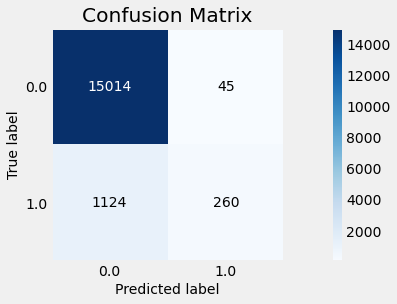

In [78]:
adc = AdaBoostClassifier(n_estimators=100)
adc.fit(X_train, y_train)
preds_valid = adc.predict(X_valid)
skplt.metrics.plot_confusion_matrix(y_valid, preds_valid)
plt.title('Confusion Matrix')
plt.show()

In [79]:
print("Accuracy: ",accuracy_score(y_valid,preds_valid))
print("Recall: ",recall_score(y_valid,preds_valid))
print("Precision: ",precision_score(y_valid,preds_valid))
print("F1 Score: ", f1_score(y_valid,preds_valid))

Accuracy:  0.9289059174116645
Recall:  0.18786127167630057
Precision:  0.8524590163934426
F1 Score:  0.30787448194197753


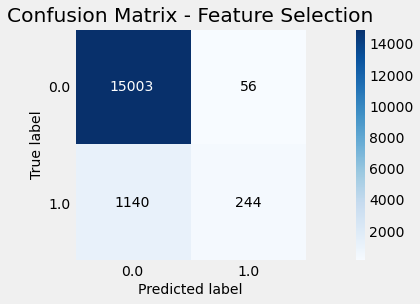

In [80]:
# model only the top_40 features
adc.fit(X_train[feat_select], y_train)
preds_valid = adc.predict(X_valid[feat_select])
skplt.metrics.plot_confusion_matrix(y_valid, preds_valid)
plt.title('Confusion Matrix - Feature Selection')
plt.show()

In [81]:
print("Accuracy: ",accuracy_score(y_valid,preds_valid))
print("Recall: ",recall_score(y_valid,preds_valid))
print("Precision: ",precision_score(y_valid,preds_valid))
print("F1 Score: ", f1_score(y_valid,preds_valid))

Accuracy:  0.9272638812868698
Recall:  0.17630057803468208
Precision:  0.8133333333333334
F1 Score:  0.2897862232779097


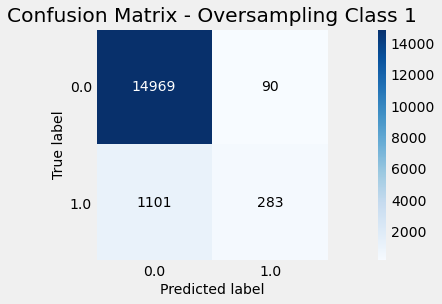

In [85]:
adc.fit(X_ros[feat_select], y_ros)
preds_valid = adc.predict(X_valid[feat_select])
skplt.metrics.plot_confusion_matrix(y_valid, preds_valid)
plt.title('Confusion Matrix - Oversampling Class 1')
plt.show()

In [86]:
print("Accuracy: ",accuracy_score(y_valid,preds_valid))
print("Recall: ",recall_score(y_valid,preds_valid))
print("Precision: ",precision_score(y_valid,preds_valid))
print("F1 Score: ",f1_score(y_valid,preds_valid))

Accuracy:  0.9275679620507207
Recall:  0.20447976878612717
Precision:  0.7587131367292225
F1 Score:  0.32214001138303927


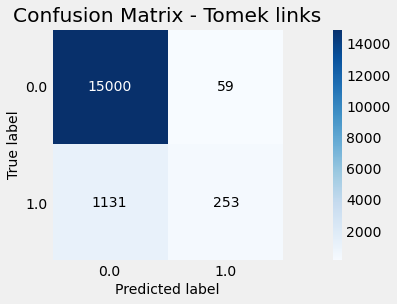

In [87]:
adc.fit(X_t1[feat_select], y_t1)
preds_valid = adc.predict(X_valid[feat_select])
skplt.metrics.plot_confusion_matrix(y_valid, preds_valid)
plt.title('Confusion Matrix - Tomek links')
plt.show()

In [89]:
print("Accuracy: ",accuracy_score(y_valid,preds_valid))
print("Recall: ",recall_score(y_valid,preds_valid))
print("Precision: ",precision_score(y_valid,preds_valid))
print("F1 Score: ",f1_score(y_valid,preds_valid))

Accuracy:  0.9276287782034909
Recall:  0.18280346820809248
Precision:  0.8108974358974359
F1 Score:  0.29834905660377364


In [90]:
# neighbourhood cleaning rule

from imblearn.under_sampling import NeighbourhoodCleaningRule

ncr = NeighbourhoodCleaningRule()
X_ncr,y_ncr= ncr.fit_resample(X_train[feat_select],y_train)

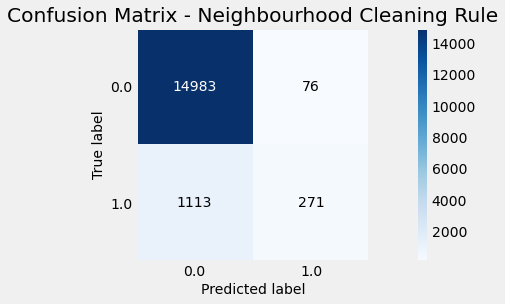

In [91]:
adc.fit(X_ncr[feat_select], y_ncr)
preds_valid = adc.predict(X_valid[feat_select])
skplt.metrics.plot_confusion_matrix(y_valid, preds_valid)
plt.title('Confusion Matrix - Neighbourhood Cleaning Rule')
plt.show()

In [92]:
print("Accuracy: ",accuracy_score(y_valid,preds_valid))
print("Recall: ",recall_score(y_valid,preds_valid))
print("Precision: ",precision_score(y_valid,preds_valid))
print("F1 Score: ",f1_score(y_valid,preds_valid))

Accuracy:  0.927689594356261
Recall:  0.1958092485549133
Precision:  0.7809798270893372
F1 Score:  0.31311380704794917


In [ ]:
#Logistic Regression

In [94]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score,recall_score, f1_score

lgr = LogisticRegression()
lgr.fit(X_train, y_train)
preds_valid = lgr.predict(X_valid)
print("The accuracy score is: ", format(accuracy_score(y_valid,preds_valid),".4f"))
print(" ")
print("Confusion matrix: ","\n",confusion_matrix(y_valid,preds_valid))

The accuracy score is:  0.9158
 
Confusion matrix:  
 [[15059     0]
 [ 1384     0]]


In [95]:
print(classification_report(y_valid,preds_valid))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     15059
         1.0       0.00      0.00      0.00      1384

    accuracy                           0.92     16443
   macro avg       0.46      0.50      0.48     16443
weighted avg       0.84      0.92      0.88     16443



In [96]:
#RandomForest

In [97]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=0)
RF_model.fit(X_train, y_train)
y_predict_rf = RF_model.predict(X_valid)
print("The accuracy score is: ", format(accuracy_score(y_valid,y_predict_rf),".4f"))
print(" ")
print("Confusion matrix: ","\n",confusion_matrix(y_valid,y_predict_rf))

The accuracy score is:  0.9192
 
Confusion matrix:  
 [[15057     2]
 [ 1326    58]]


In [98]:
print(classification_report(y_valid,y_predict_rf))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     15059
         1.0       0.97      0.04      0.08      1384

    accuracy                           0.92     16443
   macro avg       0.94      0.52      0.52     16443
weighted avg       0.92      0.92      0.88     16443



In [99]:
dec_tree_model = tree.DecisionTreeClassifier(random_state=0, max_depth=5)
dec_tree_model.fit(X_train, y_train)
y_predict_dt = dec_tree_model.predict(X_valid)
print("The accuracy score is: ", format(accuracy_score(y_valid,y_predict_dt),".4f"))
print(" ")
print("Confusion matrix: ","\n",confusion_matrix(y_valid,y_predict_dt))

The accuracy score is:  0.9281
 
Confusion matrix:  
 [[15029    30]
 [ 1153   231]]


In [100]:
print(classification_report(y_valid,y_predict_dt))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     15059
         1.0       0.89      0.17      0.28      1384

    accuracy                           0.93     16443
   macro avg       0.91      0.58      0.62     16443
weighted avg       0.93      0.93      0.90     16443



In [126]:
test.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won?', 'avg_training_score', 'is_promoted',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'regio

In [189]:
test.shape

(23490, 59)

In [190]:
test['is_promoted'] = adc.predict(test[feat_select])
test.is_promoted.value_counts()

0.0    21240
1.0     2250
Name: is_promoted, dtype: int64